<a href="https://colab.research.google.com/github/unica-isde/isde/blob/master/notebooks/lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A simple classification problem

In [19]:
import pandas as pd
import numpy as np


def load_mnist_data(filename, n_samples=None):
    """This function returns MNIST handwritten digits and labels as ndarrays."""
    data = pd.read_csv(filename)
    data = np.array(data)  # cast pandas dataframe to numpy array
    if n_samples is not None:  # only returning the first n_samples
        data = data[:n_samples, :]
    y = data[:,0]
    x = data[:,1:] / 255.0
    return x, y


# filename = "https://download.mlcc.google.com/mledu-datasets/mnist_train_small.csv"
filename = "https://github.com/unica-isde/isde/raw/master/data/mnist_data.csv"

x, y = load_mnist_data(filename, n_samples=1000)
print(x.shape)
print(y.shape)
print(y, type(y))
print(x, type(x))

(1000, 784)
(1000,)
[6 7 0 6 8 2 6 3 9 3 2 8 6 1 7 4 8 8 9 0 3 3 9 0 5 2 9 4 1 0 3 7 5 8 7 7 8
 2 9 7 1 2 6 4 2 5 2 3 6 6 5 0 0 2 8 1 6 1 0 4 3 1 6 1 9 0 1 4 5 6 7 8 9 1
 2 3 4 5 6 7 0 1 2 3 4 5 6 7 8 9 8 4 0 0 7 2 4 3 8 6 6 3 2 6 3 3 0 1 4 7 8
 0 3 1 9 0 1 9 1 2 7 0 1 3 8 2 9 2 7 6 5 5 9 9 8 2 9 1 3 2 3 4 3 1 9 0 9 3
 6 8 7 0 1 0 5 8 2 7 7 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5
 6 7 8 9 1 7 4 8 1 5 6 5 7 2 8 6 3 3 8 6 5 4 0 9 1 7 2 9 1 5 1 3 2 2 3 0 6
 4 3 7 6 9 0 4 8 1 4 0 6 1 2 6 9 2 2 3 5 5 1 0 7 7 9 6 2 9 4 7 0 2 3 4 0 0
 8 8 8 5 1 3 7 4 9 8 8 9 0 9 8 9 0 2 6 5 6 7 4 7 5 4 1 3 5 3 1 2 3 4 5 6 1
 2 3 4 6 0 1 2 4 5 6 7 8 1 7 2 4 1 4 1 4 9 6 8 4 5 3 7 8 4 3 3 5 6 7 0 6 1
 6 8 7 0 1 5 0 8 5 0 1 5 8 4 2 3 9 7 6 9 1 9 0 6 7 1 2 3 9 2 4 5 5 3 7 5 3
 1 8 2 2 3 0 2 9 4 9 7 0 2 7 4 9 9 2 5 9 8 3 8 6 7 0 0 1 2 3 4 5 6 7 8 9 0
 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 0 7 2 6 5 5 3 7 8 6 6 6 6 4 3 8 8
 3 0 1 9 0 5 4 1 9 1 2 7 0 1 3 8 2 9 2 7 4 2 6 5 5 9 9 1 1 5 7 6 8 2 9 4 3
 1 9 

In [20]:
num_classes = 10
counts = np.zeros(shape=(num_classes,), dtype=int)

for i in range(num_classes):
    counts[i] = np.array(y==i).sum()
    print(i, counts[i])

print(counts)


0 105
1 113
2 105
3 99
4 87
5 89
6 101
7 98
8 102
9 101
[105 113 105  99  87  89 101  98 102 101]


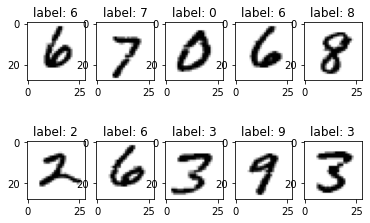

In [21]:
import matplotlib.pyplot as plt


def plot_image(im, shape=(28,28)):
    im = im.reshape(shape)  # reshape the digit to be 28x28
    plt.imshow(im, cmap='binary')


for i in range(10):
    plt.subplot(2, 5, i+1)
    image = x[i, :]
    plot_image(image)
    plt.title("label: " + str(y[i]))


105
105
(784,)


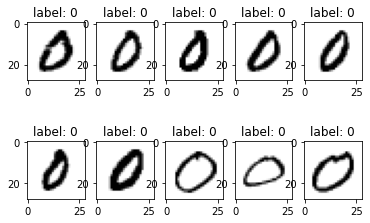

In [33]:
# fit my classification function (estimate centroids from training data)
x0 = x[y==0, :]
y0 = y[y==0]

print(y0.size)
print(x0.shape[0])

for i in range(10):
    plt.subplot(2, 5, i+1)
    image = x0[i, :]
    plot_image(image)
    plt.title("label: " + str(y0[i]))

centroid0 = x0.mean(axis=0)
print(centroid0.shape)


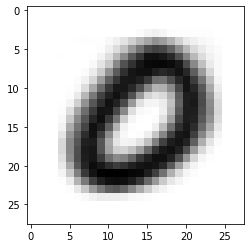

In [34]:

plot_image(centroid0)


(1000, 784)
(10, 784)


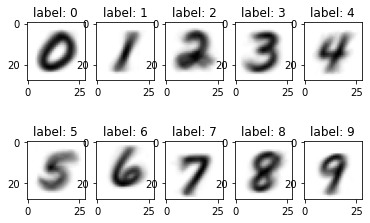

In [39]:
# compute centroid for each class

print(x.shape)

num_features = x.shape[1]
centroids = np.zeros(shape=(num_classes, num_features))
print(centroids.shape)

for i in range(num_classes):
    xi = x[y==i, :]  # all digits from class i
    centroids[i,:] = xi.mean(axis=0)  # average digit for class i

for i in range(10):
    plt.subplot(2, 5, i+1)
    plot_image(centroids[i, :])
    plt.title("label: " + str(i))

[0 1 2 3 4 5 6 7 8 9]
0 a
1 b
2 c


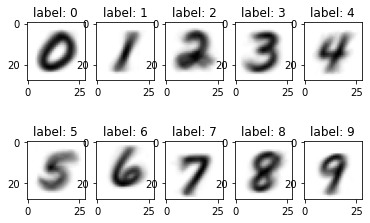

In [43]:
# wrap it into the fit function

print(np.unique(y))

def fit(x_tr, y_tr):
    """Estimate the centroid for each class from the training data"""
    labels = np.unique(y_tr) 
    centroids = np.zeros(shape=(labels.size, x_tr.shape[1]))

    for i, label in enumerate(labels):
        centroids[i,:] = x_tr[y_tr==label, :].mean(axis=0)  # centr. for class i

    return centroids, labels


centroids, labels = fit(x, y)

for i in range(10):
    plt.subplot(2, 5, i+1)
    plot_image(centroids[i, :])
    plt.title("label: " + str(labels[i]))



names = ['a', 'b', 'c']

for i, name in enumerate(names):
    print(i, name)